In [2]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def loadImage(path):
    imageMat = plt.imread(path)
    plt.imshow(imageMat)
    return imageMat

In [4]:
def randomizeTrainset(imageMat):
    imageSize = np.shape(imageMat)
    x = np.random.randint(imageSize[0], size=5000)
    y = np.random.randint(imageSize[1], size=5000)
    trainIndex = np.column_stack((x,y))
    trainPixels = imageMat[x,y]
    trainPixelsNor = trainPixels/255
    return trainIndex,trainPixelsNor

In [5]:
def fitRandomForests(trainIndex,trainPixelsNor,depth,treeNum,bootstrapMode = True):
    RF_Red = RandomForestRegressor(max_depth=depth, n_estimators = treeNum, random_state=0,bootstrap = bootstrapMode)
    RF_Green = RandomForestRegressor(max_depth=depth, n_estimators = treeNum, random_state=0,bootstrap = bootstrapMode)
    RF_Blue = RandomForestRegressor(max_depth=depth, n_estimators = treeNum, random_state=0,bootstrap = bootstrapMode)
    predictorList = [RF_Red,RF_Green,RF_Blue]
    for i in range(3):
        predictorList[i].fit(trainIndex,trainPixelsNor[:,i])
    return predictorList

In [6]:
def fitKnn(trainIndex,trainPixelsNor,k):
    KN_Red = KNeighborsRegressor(n_neighbors=k)
    KN_Green = KNeighborsRegressor(n_neighbors=k)
    KN_Blue = KNeighborsRegressor(n_neighbors=k)
    predictorList = [KN_Red,KN_Green,KN_Blue]
    for i in range(3):
        predictorList[i].fit(trainIndex,trainPixelsNor[:,i])
    return predictorList

In [82]:
def predictImage(imageSize,predictorList):
    predictImageMat = np.zeros((imageSize[0],imageSize[1],3))
    for channelInd in range(3):
        for rowInd in range(lenaSize[0]):
            x_pred = np.ones(lenaSize[1])*rowInd
            y_pred = np.arange(lenaSize[1])
            predictIndex = np.column_stack((x_pred,y_pred))
            predictor = predictorList[channelInd]
            predictImageMat[rowInd,:,channelInd] = predictor.predict(predictIndex)
        predictImageMat[:,:,channelInd] = predictImageMat[:,:,channelInd]
    return predictImageMat

## Load Image

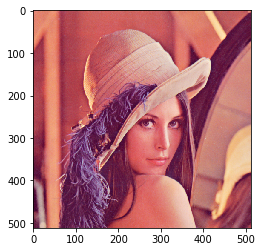

In [90]:
lena = loadImage('lena.tiff')
lenaSize = np.shape(lena)
plt.imshow(lena)

## Select Training Pixels by Random

In [91]:
trainIndex, trainPixelsNor = randomizeTrainset(lena)

## Train Random Forests for each Channel with different Depth

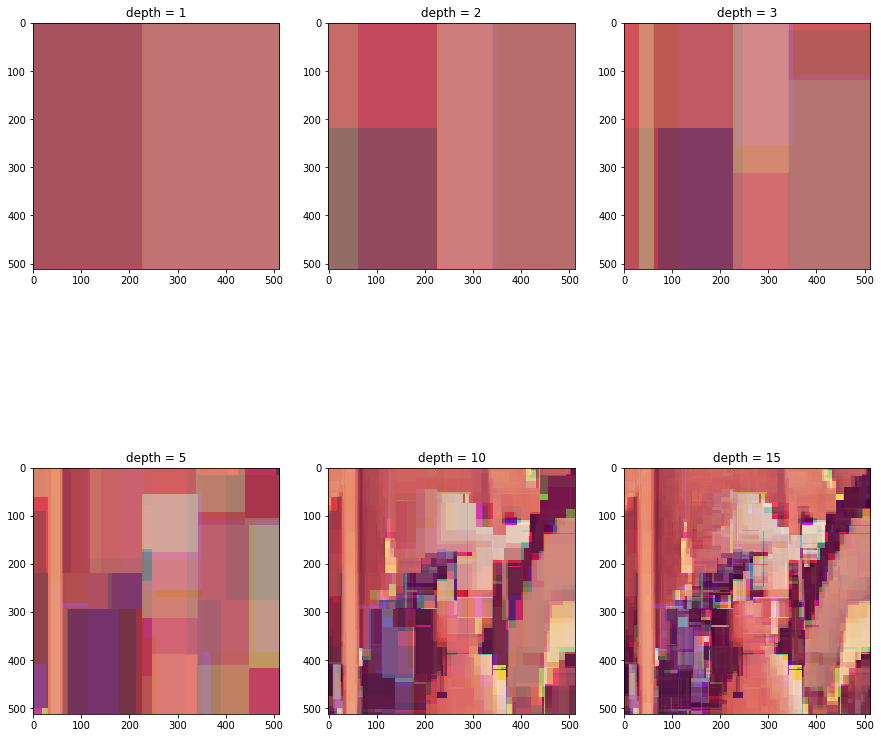

In [92]:
depthList = [1,2,3,5,10,15]
f, axarr = plt.subplots(2, 3, figsize=(15,15))
for ind in range(6):
    predictorList = fitRandomForests(trainIndex, trainPixelsNor,depthList[ind],1)
    predictImageMat = predictImage(lenaSize,predictorList)
    axarr[int(ind/3),ind%3].imshow(predictImageMat)
    axarr[int(ind/3),ind%3].set_title('depth = '+str(depthList[ind]))

## Train Random Forests for each Channel with different Tree Number

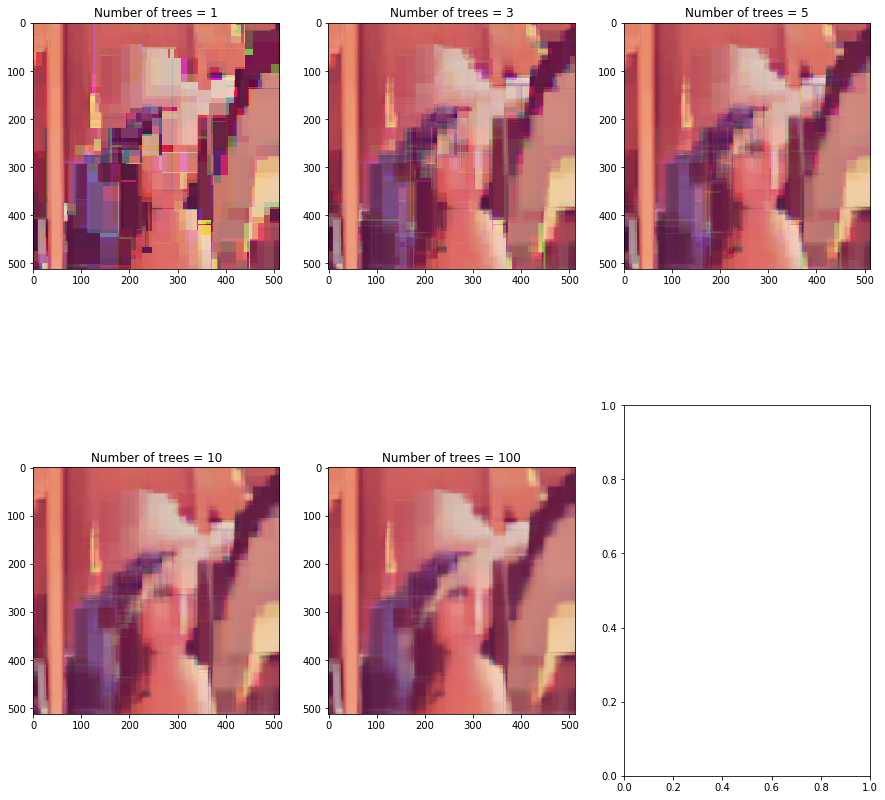

In [93]:
treeNumList = [1,3,5,10,100]
f, axarr = plt.subplots(2, 3, figsize=(15,15))
for ind in range(5):
    predictorList = fitRandomForests(trainIndex, trainPixelsNor,10,treeNumList[ind])
    predictImageMat = predictImage(lenaSize,predictorList)
    axarr[int(ind/3),ind%3].imshow(predictImageMat)
    axarr[int(ind/3),ind%3].set_title('Number of trees = '+str(treeNumList[ind]))

## Practice Different Bootstrap Options

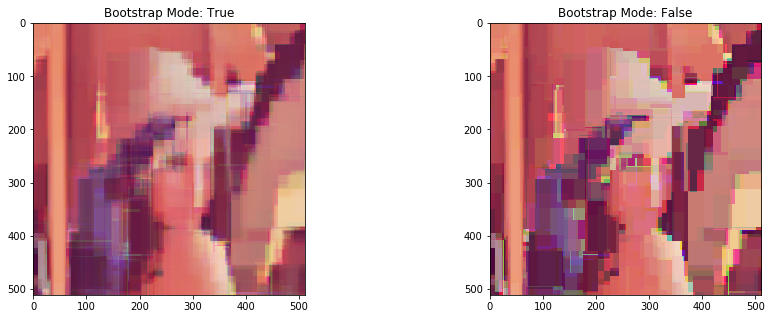

In [94]:
bsModeList = [True,False]
f, axarr = plt.subplots(1, 2, figsize=(15,5))
for ind in range(2):
    predictorList = fitRandomForests(trainIndex, trainPixelsNor,10,5,bsModeList[ind])
    predictImageMat = predictImage(lenaSize,predictorList)
    axarr[ind].imshow(predictImageMat)
    axarr[ind].set_title('Bootstrap Mode: '+str(bsModeList[ind]))

## Train 1-Nearest-Neighbor for Comparison

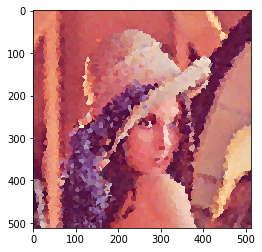

In [95]:
predictorList = fitKnn(trainIndex, trainPixelsNor,1)
predictImageMat = predictImage(lenaSize,predictorList)
plt.imshow(predictImageMat)